# Lending Club Case Study

Lending Club is a consumer finance company which specialises in lending various types of loans to urban customers.
It is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

<font color = blue>**Problem Statement**</font><br>

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

Lending Club wants to identify the risky loan applicants then such loans can be reduced thereby cutting down the amount of credit loss.


<font color = blue>**Aim of the case study**</font><br>

To help the company to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company then, can utilise this knowledge for its portfolio and risk assessment. It can further be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
 

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset and check the first five rows
loan_df = pd.read_csv("loan.csv" , low_memory = False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Check the shape of the dataframe
loan_df.shape

(39717, 111)

In [4]:
# Check the columns of the dataframe
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Data Understanding

In order to analyse the data and fullfil the aim of the case study it is imperative to understand what data set is all about.
<br>Following is what important columns in given data set represents:

##### Important columns and their description :

1. **loan_amnt** : Amount of loan requested by the borrower(#)
2. **Funded_amnt**: Amount approved by the lending club(#). It should be less than equal to loan_amount
3. **funded_amnt_inv** : Amount approved and lended by the investor(#). It should be either less than or equal to funded_amnt
4. **term**: Duration of loan/installments( in months) .Can be either 36 months or 60 months.
5. **int_rate**: Rate of interest of loan(in %).
6. **installment**:The monthly payment that borrower needs to pay if loan gets approved(#)
7. **grade**:Grades assigned by lending club based on borrower credibility and underlying risk. ( Values are from A to D)
8. **sub_grade**: Sub Grades are further division of grades. Each grade has 5 sub grades( A1 to G)
9. **annual_inc** : Income provided by borrower at the time of application
10. **purpose** : Reason provided by borrower for taking the loan like credit card, small business etc
11. **dti** : It is debt to income ratio i.e. monthly debt payment divided by monthy income. Lower dti is good.
12. **Emp_length** : Employment length in years. Values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
13. **issue_d** : Month in which loan is issued/funded.( monthly)
14. **home_ownership** : Home ownership status provided by the borrower. 4 Values( RENT, OWN, MORTGAGE, OTHER)
15. **Verification_status** :Indicates if income was verified by lendling club. 3 Values ( verified, source verified, not verified)
16. **loan_status** : Status of the loan. 3 values( fully paid, charged off, current).

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
    
 - Data Imputation:
     - Filling null or missing values
     - Usually median or mean is used for numerical values and mode for categorical values
    
 **After initial analysis and understanding of data set.We are going to do the following**:
 
 - __Columns__:<br>
        - Missing value treatment<br>
        - Dropping the columns related to customer behaviour<br>
        - Doing further analysis and dropping further colummns 
        
 - __Rows__:<br>
         - Dropping all the records related to the 'Current' Loan_status


In [5]:
#Check the datatypes of all the columns of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Columns

##### 1. Missing Value Treatment

In [6]:
#Check the number of null values in the columns
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

This shows there are few columns which have all data as null. Let us check its percentage

In [7]:
# Percentage of missing values in columns with no. of columns
(loan_df.isnull().sum() / loan_df.shape[0] * 100).value_counts() 

100.000000    54
0.000000      43
0.140998       2
6.191303       1
2.706650       1
32.580507      1
0.027696       1
64.662487      1
92.985372      1
0.125891       1
0.178765       1
97.129693      1
0.005036       1
1.754916       1
0.098195       1
dtype: int64

This shows there are 54 columns with 100% missing values.They can be dropped for further analysis.
It also shows that there are certain columns with 97% and 92% missing data. We can analsyse further which are these columns and can drop them as well

In [8]:
# Dropping the columns with all null values
loan_df = loan_df.dropna(how='all',axis = 'columns')
loan_df.shape

(39717, 57)

No. of columns is reduced to 57

##### 2. Dropping columns related to customer behaviour
Initial analysis on data shows we can remove customer behavior columns as this data will not be available at the time of loan application and thus they cannot be used as predictors for credit approval.

     Following columns has been identified to be related to customer behaviour :  
              - delinq_2yrs
              - earliest_cr_line
              - inq_last_6mths
              - open_acc
              - pub_rec
              - revol_bal
              - revol_util
              - total_acc
              - out_prncp
              - out_prncp_inv
              - total_pymnt
              - total_pymnt_inv
              - total_rec_prncp
              - total_rec_int
              - total_rec_late_fee
              - recoveries
              - collection_recovery_fee
              - last_pymnt_d
              - last_pymnt_amnt
              - last_credit_pull_d
              - application_type             

In [9]:
# Creating list of customer behaviour coulumns and dropping them
to_be_deleted_cb_columns = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']
loan_df = loan_df.drop(columns = to_be_deleted_cb_columns)

In [10]:
# Checking remaining columns
loan_df.info()

# There should be now 36 columns remaining in data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### 3. Doing further analysis and dropping further colummns
        Here we can do the following:
        - Check the columns which will not attribute to analysis as per our assumption like member id, id , url etc 
        - Check further columns with high null values/misisng values 
        - Check columns which are having single value 
        All these columns can be dropped.    
        

In [11]:
# columns 'id','member_id','desc', url','zip_code','acc_now_delinq' , 'mths_since_last_delinq'  ,'title' 'pub_rec_bankruptcies' will not play any role in analysis. Hence dropping them

to_be_deleted_columns_list2 = ['id','member_id', 'desc', 'url', 'zip_code', 'acc_now_delinq', 'mths_since_last_delinq','title','pub_rec_bankruptcies']
loan_df = loan_df.drop(columns = to_be_deleted_columns_list2)

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [12]:
# Created list of certain columns to understand their value distribution

list_col = ['tax_liens','delinq_amnt','chargeoff_within_12_mths','policy_code', 'pymnt_plan','initial_list_status','collections_12_mths_ex_med' ]
for i in list_col:
    count = loan_df[i].value_counts()
    print(f'total value of column \033[1m{i}\033[0m is ', len(loan_df[i]))
    print(f'Count of null values of column \033[1m{i}\033[0m is ', loan_df[i].isnull().sum())
    print(f'Count of values in column \033[1m {i}\033[0m is ', count )
    print(' ')
    

total value of column tax_liens is  39717
Count of null values of column tax_liens is  39
Count of values in column  tax_liens is  0.0    39678
Name: tax_liens, dtype: int64
 
total value of column delinq_amnt is  39717
Count of null values of column delinq_amnt is  0
Count of values in column  delinq_amnt is  0    39717
Name: delinq_amnt, dtype: int64
 
total value of column chargeoff_within_12_mths is  39717
Count of null values of column chargeoff_within_12_mths is  56
Count of values in column  chargeoff_within_12_mths is  0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
 
total value of column policy_code is  39717
Count of null values of column policy_code is  0
Count of values in column  policy_code is  1    39717
Name: policy_code, dtype: int64
 
total value of column pymnt_plan is  39717
Count of null values of column pymnt_plan is  0
Count of values in column  pymnt_plan is  n    39717
Name: pymnt_plan, dtype: int64
 
total value of column initial_list_status is  397

Since most or all values of the columns mentioned above have same value. These columns will not attribute in analysis. hence we can drop them

In [13]:
# deleting the columns having same value throughout

to_be_deleted_columns_list3 = list_col
loan_df = loan_df.drop(columns = to_be_deleted_columns_list3)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

Now the columns count is reduced.

Let's check the null values in the current dataset.

In [14]:
loan_df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

Columns like __mths_since_last_record__, __next_pymnt_d__ shows that a larger number of null values are present. Lets analyze them one by one.
<br><br> Employement length is having 1075 null/missing values. Here we can use the imputation to fill these.
<br>Method to be used : take the mean of two nearest values (for this we need to first convert the emp_length column to numeric).

In [15]:
loan_df.shape

(39717, 20)

In [16]:
# percentage of null values in columns 'mths_since_last_record' & 'next_pymnt_d'

per = loan_df.mths_since_last_record.isnull().sum()/len(loan_df) *100
print( 'Percentage of null values in column \033[1m mths_since_last_record\033[0m is' , per)

per = loan_df.next_pymnt_d.isnull().sum()/len(loan_df) *100
print( 'Percentage of null values in column \033[1mnext_pymnt_d\033[0m is' , per)

Percentage of null values in column  mths_since_last_record is 92.98537150338646
Percentage of null values in column next_pymnt_d is 97.12969257496789


As we can see that it is 92% and 97% respectively which is quite huge. We are going to delete these columns as well

In [17]:
loan_df = loan_df.drop(columns = ['mths_since_last_record','next_pymnt_d'])

In [18]:
# final data set shape and info after removing the columns
print(loan_df.shape)
print(loan_df.info())

(39717, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            37258 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  purpose              397

### Rows

We can remove the rows for which the loan_status is 'Current' as the loan is already provided and there is no absolute value associated that this would result in 'Fully paid' or 'Charged Off'. So it does not fall under the scope of our analysis

In [19]:
loan_df = loan_df[~ (loan_df.loan_status == 'Current')]

In [20]:
loan_df.shape

(38577, 18)

### Data Sanity check

Under this we check if data provided in data set is proper for analysis or not. 
One of the check in current data set is
- Loan amount should be always greater than or equal to funded amount and funded amount should be greater than or equal to funded amount invested.
i.e. loan_amnt >= funded_amount >= funded_amnt_inv

In [21]:
#checking if loan amount is less than the funded amount in any row
print(loan_df[loan_df['loan_amnt'] < loan_df['funded_amnt']].shape)

#checking if funded amount is less than the funded amount invested in any row
print(loan_df[loan_df.funded_amnt < loan_df.funded_amnt_inv].shape)

(0, 18)
(0, 18)


There are no such rows, so data seems to be good.

### Data Manipulation
Data manipulation is also part of data cleaning. Here we will manipulate the columns such that we can analyse them and correlate them.
We are going to the following manipulations:
1. Removing the 'months' from column Term and renaming it to 'Term in mnths'
2. Removing the '% ' sign from column int_rate
3. Pulling out the month and year from  the issue_d column
4. Creating new column for loan status using labelling method 


In [22]:
# lets check the dataset info once again
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           37544 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  purpose              38577 non-null 

In [23]:
# Creating the new column 'term in months' of int type using column 'term' by removing keyword 'months'
# removing the column term
loan_df['term_in_months'] = loan_df['term'].apply(lambda x:int(x.split(" months")[0]))
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           37544 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  purpose              38577 non-null 

In [24]:
#column 'term' can be now deleted
loan_df = loan_df.drop( columns = 'term')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_title            36191 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

In [25]:
# we can create a loan_issue_month from issue_d
loan_df['loan_issue_month'] = loan_df['issue_d'].apply(lambda x:x.split("-")[0])
loan_df.loan_issue_month.value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: loan_issue_month, dtype: int64

In [26]:
#column 'issue_d' can be now deleted
loan_df = loan_df.drop( columns = 'issue_d')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_title            36191 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null 

In [27]:
# '%' can be removed
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x:float(x.split("%")[0]))
loan_df.int_rate.info()

<class 'pandas.core.series.Series'>
Int64Index: 38577 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
38577 non-null  float64
dtypes: float64(1)
memory usage: 602.8 KB


In [28]:
#lets check the value counts for column loan_status
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

Since loan_status is a categorical value, lets create a new column using labelling method by assigning 0 and 1 as labels for Charged off and Fully Paid respectively.

In [29]:
# Let's create a new column loan_status_b for binary values of laon_status
loan_df['loan_status_b'] = loan_df['loan_status'].apply(lambda x:1 if x == 'Fully Paid' else 0)


In [30]:
# lets check the value counts for both these columns
print(loan_df.loan_status_b.value_counts())


1    32950
0     5627
Name: loan_status_b, dtype: int64


So here data count is correct

### Data Analysis
Here we will analyse the data using :
- Univariate analysis on the independent and target variables
- Segmented univariate analysis with respect to target variable
- Bivariate analysis of independent and target variables 

In [31]:
loan_df.shape

(38577, 19)

In [32]:
# Checking number of numerical and categorical values
numerical_var = loan_df.dtypes[loan_df.dtypes !='object'].index
print("Number of Numerical Variables :", len(numerical_var))

categorical_var = loan_df.dtypes[loan_df.dtypes =='object'].index
print("Number of Categorical Variables :" ,len(categorical_var))

Number of Numerical Variables : 9
Number of Categorical Variables : 10


### Univariate Analysis
Here we will check the distribution of data of various numerical and catgorical variables

##### Numerical variables
- Distribution analysis of loan_amnt
- Distribution analysis of int_rate
- Distribution analysis of installment
- Distribution analysis of annual_inc
- Distribution analysis of dti

In [33]:
numerical_var

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'term_in_months', 'loan_status_b'],
      dtype='object')

**1. Annual Income**

In [34]:
# describe annual income data
loan_df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

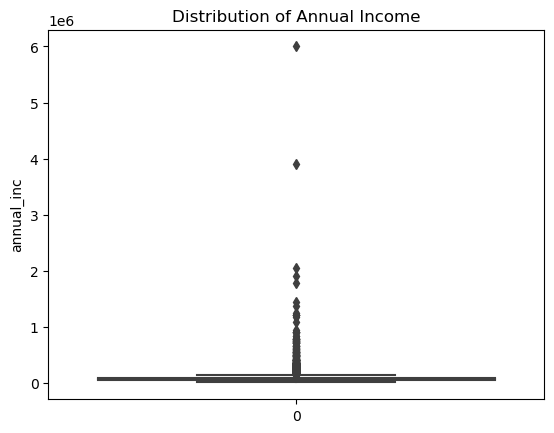

In [35]:
# box plot for annual income
sns.boxplot(loan_df.annual_inc).set(ylabel='annual_inc')
plt.title("Distribution of Annual Income", fontsize = 12)
plt.show()

Data is highly skewed. lets try creating new column for annual income with base log10 and then check the plot

In [36]:
# creating another column of annual income with log base 10
loan_df['annual_inc_log10'] = np.log10(loan_df['annual_inc'])

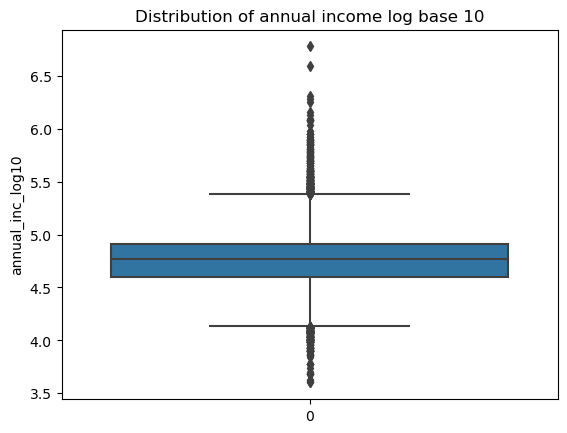

In [37]:
# again creating box plot for new column of annual inc  with log base 10
sns.boxplot(loan_df.annual_inc_log10).set(ylabel='annual_inc_log10')
plt.title("Distribution of annual income log base 10", fontsize = 12)
plt.show()

Plot is still seems to be highly skewed. Lets try removing some outliers such that median is not moved much. After much deliberation , we decided to remove 5% of data which on the highest side.

In [38]:
# removing the income of very high side last 5 percent
loan_df2 = loan_df[(loan_df.annual_inc < np.quantile(loan_df.annual_inc,.95))]

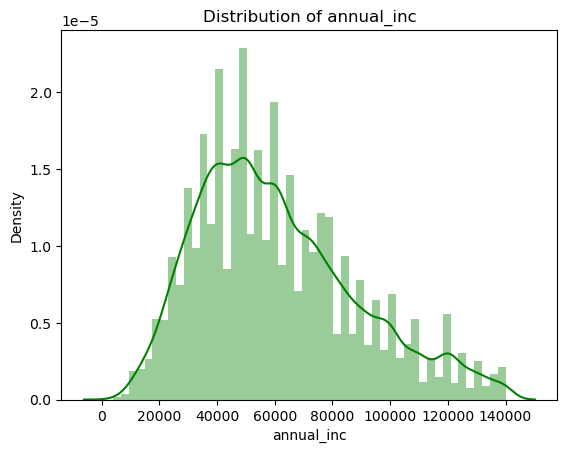

In [39]:
# plotting the distplot again
sns.distplot(loan_df2.annual_inc, color='g').set(title="Distribution of annual_inc")
plt.show()

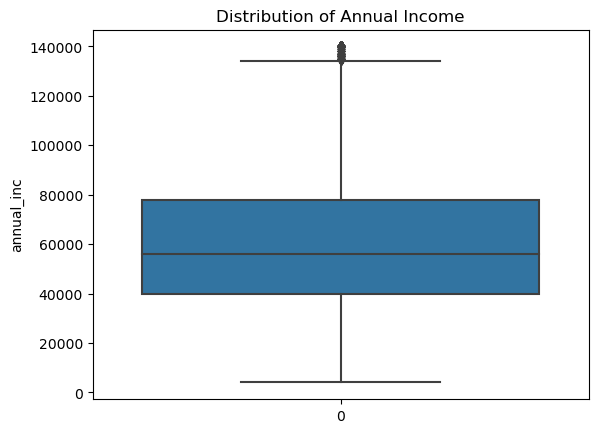

In [40]:
# let's check the box plot for annual income distribution
sns.boxplot(loan_df2.annual_inc).set(ylabel='annual_inc')
plt.title("Distribution of Annual Income", fontsize = 12)
plt.show()

<font color = blue>**Inference( Annual Income Distribution)**<font>

- After removing the outliers, plot seems normal.
- Income is highly skewed on higher range
- after removing outliers, 75% of applicants have the annual income less than 80000

#### 2. loan_amnt ( Amount of loan requested by borrower)

In [41]:
loan_df2.loan_amnt.describe()

count    36642.000000
mean     10681.045658
std       7047.619569
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

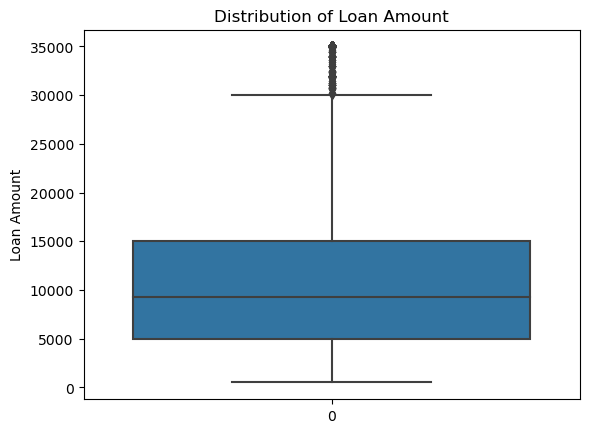

In [42]:
sns.boxplot(loan_df2.loan_amnt).set(ylabel='Loan Amount')
plt.title("Distribution of Loan Amount", fontsize = 12)
plt.show()

<font color = blue>**Inference( Distribution if loan amount)**<font>
- Most of the loan amount lies between 5000 & 15000.
- Outliers are in range from 30000.

In [43]:
# find the exact number of outliers
(loan_df2['loan_amnt'] >= 35000).sum()

429

These outliers could be important. So lets keep them for now.

#### 3. Interest Rate

In [44]:
# checking the distibution of interest rate
loan_df2.int_rate.describe()

count    36642.000000
mean        11.887884
std          3.667161
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

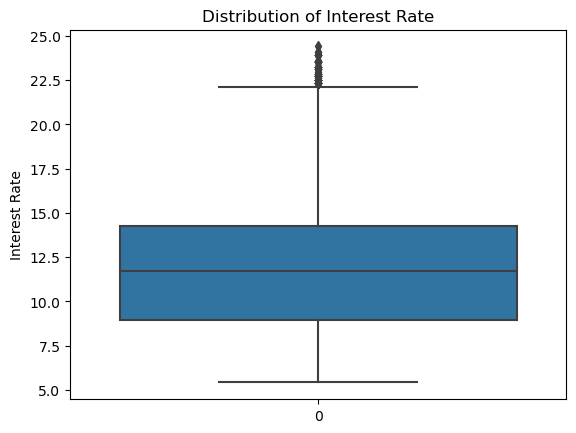

In [45]:
sns.boxplot(loan_df2.int_rate).set(ylabel='Interest Rate')
plt.title("Distribution of Interest Rate", fontsize = 12)
plt.show()

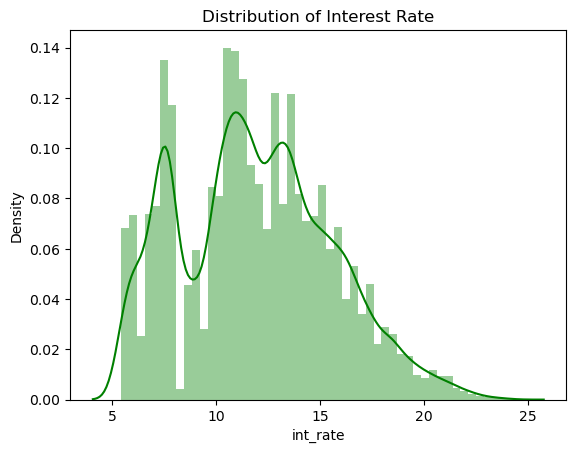

In [46]:
# We can also check the distribution as shown below:
sns.distplot(loan_df2.int_rate, color='g').set(title="Distribution of Interest Rate")
plt.show()

<font color = blue>**Inference( distribution of Interest Rate)**<font>
- Average of interest rate is 11.9 ~ 12%
- Most loan interest rate lies within range (9,15).
- And we have outliers from 22.5
- The plot is right skewed.
- The dist plot shows the most frequent interest rate is around 11.
- There are very few loans with interest rate greater than 20.

####  4. installment

In [47]:
# describing Installment
loan_df2.installment.describe()

count    36642.000000
mean       311.863566
std        199.215000
min         15.690000
25%        163.080000
50%        270.410000
75%        408.480000
max       1305.190000
Name: installment, dtype: float64

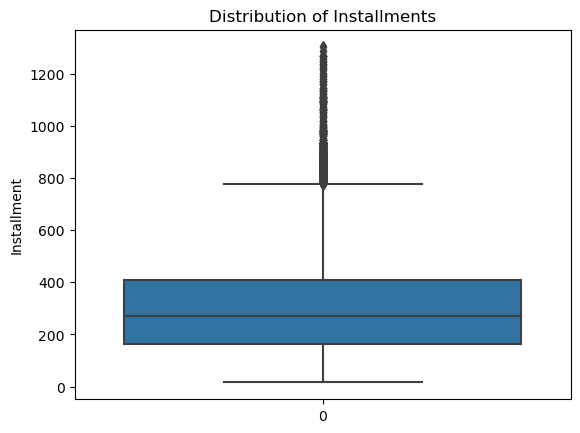

In [48]:
# box plot for installments
sns.boxplot(loan_df2.installment).set(ylabel='Installment')
plt.title("Distribution of Installments", fontsize = 12)
plt.show()

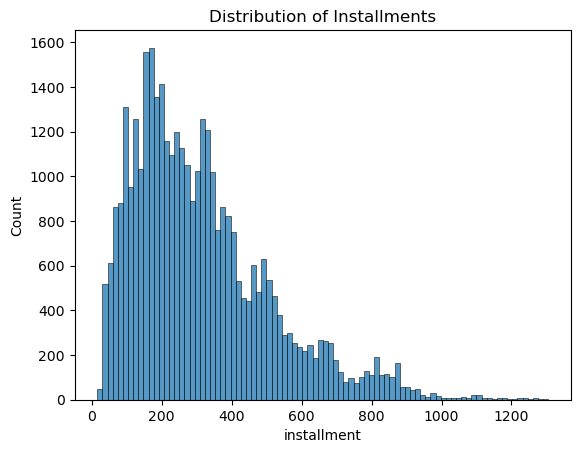

In [49]:
# histogram for installemnts
sns.histplot(loan_df2.installment)
plt.title("Distribution of Installments", fontsize = 12)
plt.show()

<font color = blue>**Inference( Distribution of Installments)**<font>
- The data is skewed on higher values.
- fewer no. of loans with big installments
- Most frequent Installment lie in bucket from 100 - 400.
    `

In [50]:
# find the exact number of outliers i.e ;lets check the installments which are greater than 800
(loan_df2['installment'] >= 1000).sum()

157

Since 1571 is a large number of dataset, we will keep it.

#### 5. dti ( Debt to income ratio)

In [51]:
# Debt to income ratio describe
loan_df2.dti.describe()

count    36642.000000
mean        13.447256
std          6.661561
min          0.000000
25%          8.350000
50%         13.580000
75%         18.717500
max         29.990000
Name: dti, dtype: float64

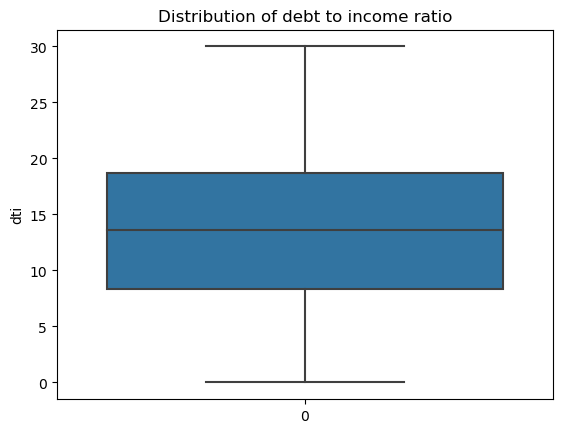

In [52]:
# box plot for DTI
sns.boxplot(loan_df2.dti).set(ylabel='dti')
plt.title("Distribution of debt to income ratio", fontsize = 12)
plt.show()

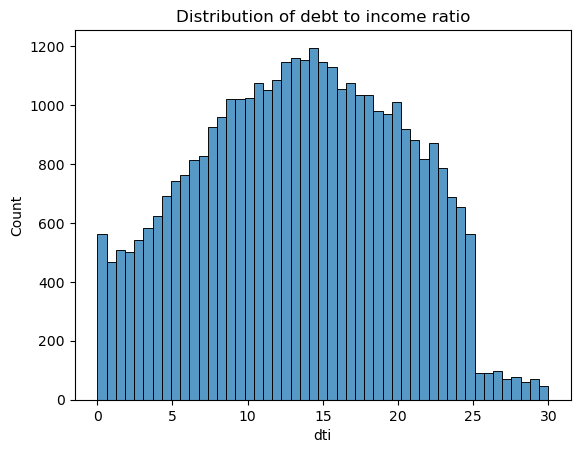

In [53]:
# histogram for the same
sns.histplot(loan_df2.dti)
plt.title("Distribution of debt to income ratio", fontsize = 12)
plt.show()

<font color = blue>**Inference( Distribution of DTI )**<font>
- Loans with high DTI are quite less
- 75% loans have DTI less than 20
- High DTI ratio is definitly risky

In [54]:
# creating correlation data frame for finding the correlation matrix for numerical variables
df_corr = loan_df2[numerical_var]


In [55]:
# checking columns of df_corr
df_corr.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'term_in_months', 'loan_status_b'],
      dtype='object')

In [56]:
# removing the columns form df_corr which are not required for checking the matrix
df_corr = df_corr.drop(columns = ['loan_status_b'])

In [57]:
# correlation of continous variables
df_corr.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,term_in_months
loan_amnt,1.000000,0.981940,0.936901,0.291145,0.931488,0.403358,0.090237,0.349595
funded_amnt,0.981940,1.000000,0.954829,0.296134,0.957120,0.399203,0.089438,0.328801
funded_amnt_inv,0.936901,0.954829,1.000000,0.288743,0.902616,0.382540,0.097037,0.348418
int_rate,0.291145,0.296134,0.288743,1.000000,0.269155,0.053952,0.111587,0.435550
installment,0.931488,0.957120,0.902616,0.269155,1.000000,0.398460,0.079374,0.091692
annual_inc,0.403358,0.399203,0.382540,0.053952,0.398460,1.000000,-0.072526,0.079962
dti,0.090237,0.089438,0.097037,0.111587,0.079374,-0.072526,1.000000,0.078553
term_in_months,0.349595,0.328801,0.348418,0.435550,0.091692,0.079962,0.078553,1.000000


This shows that columns 'loan_amnt', 'funded_amnt' and 'funded_amt_inv' are highly correlated and we can use any one of these for our analysis


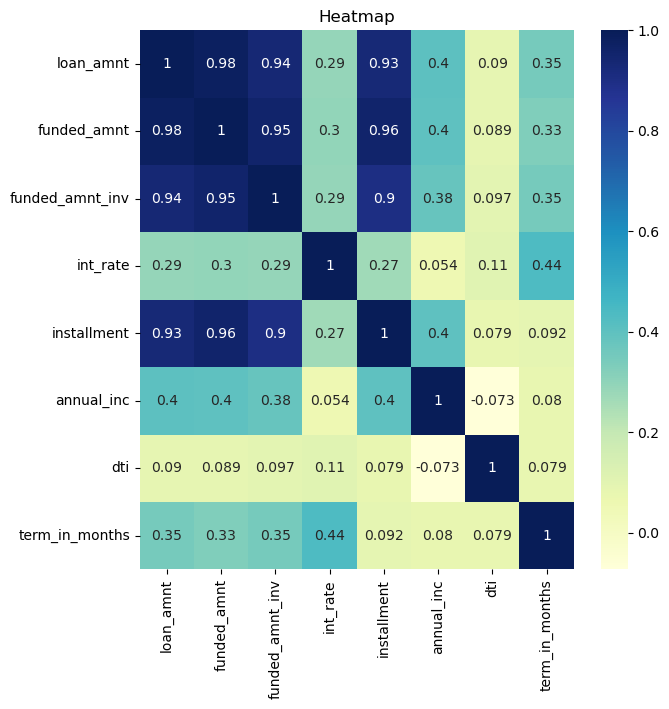

In [58]:
# finding the heatmap matrix
fig, ax = plt.subplots(figsize=(7,7))   
sns.heatmap(df_corr.corr(), cmap="YlGnBu", annot=True, ax=ax)
plt.title("Heatmap", fontsize = 12)
plt.show()

<font color = blue>**Inferences**<font>
- **_loan_amnt, funded_amnt, funded_amnt_inv_** are highly correlated and thus we can use any of these in our analysis
- **_Installmyments_** are also positively related to **_loan_amnt, funded_amnt, funded_amnt_inv_**. This is fair since higher the loan amount borrowed, higher will be the no. of installments
- **_DTI_** is negatively related to **_annual_inc_**. As the income increases, DTI decreases which make sense as debt to the income ratio will definitely decrease as income in numerator increases.
- **_Term of the of the loan_** is somewhat positively related to **_loan_amount_**. As the loan amount increases, term tend to increase 30% .
- **_Term of the of the loan_** and **_interest rate_** are 44 % co-related which means there is fair chance of increase in interest rate if term in month increases.

##### Categorical variables

Here we will do the distribution analysis of following categorical variables independently 
- grade
- subgrade
- employemt length
- home ownership
- verification status
- term in months
- loan issue month
- purpose of taking loan

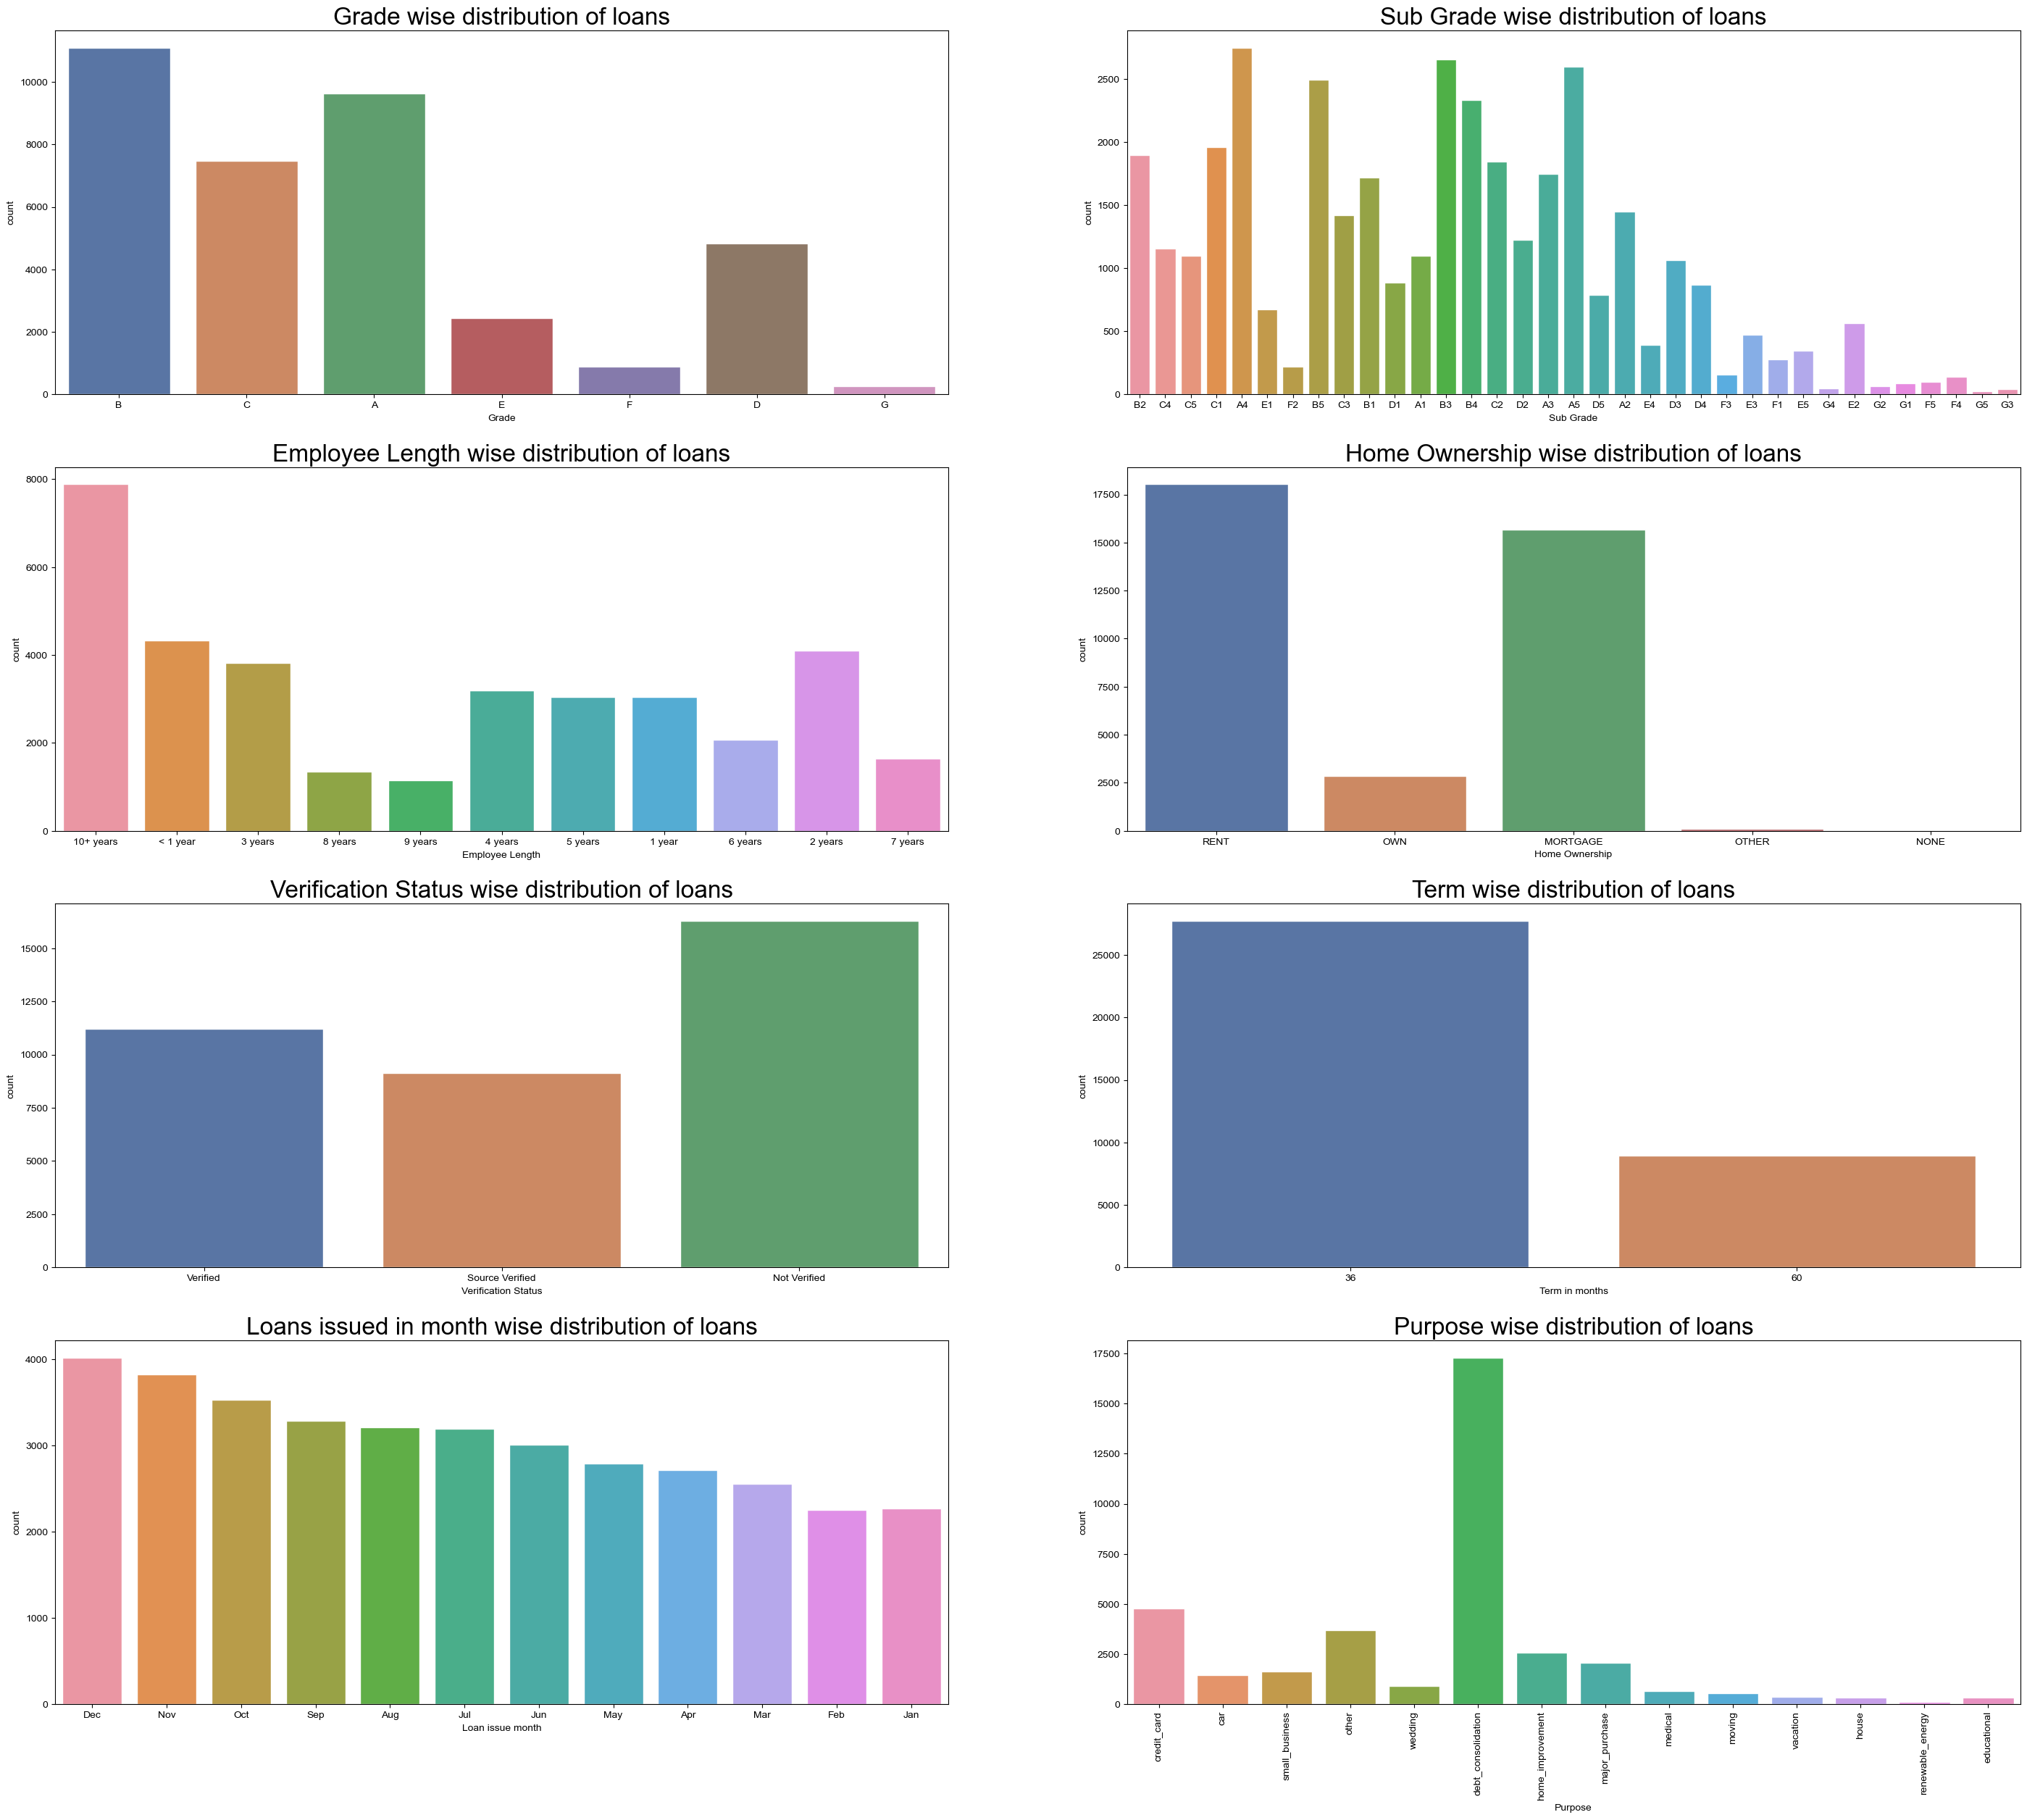

In [59]:
# univariate analysis for the categorical variables

# setting the figure size
f, axes = plt.subplots(4, 2,  figsize=(35, 30))

# setting the font size
sns.set(font_scale=2.0)

plt.xticks(rotation=90)

sns.countplot(data=loan_df2, x='grade',  orient='v', ax=axes[0][0]).set(title="Grade wise distribution of loans",xlabel ="Grade")
sns.countplot(data=loan_df2, x='sub_grade', orient='v', ax=axes[0][1]).set(title="Sub Grade wise distribution of loans",xlabel ="Sub Grade")
sns.countplot(data=loan_df2, x='emp_length', orient='v', ax=axes[1][0]).set(title="Employee Length wise distribution of loans",xlabel ="Employee Length")
sns.countplot(data=loan_df2, x='home_ownership', orient='v', ax=axes[1][1]).set(title="Home Ownership wise distribution of loans",xlabel ="Home Ownership")
sns.countplot(data=loan_df2, x='verification_status', orient='v', ax=axes[2][0]).set(title="Verification Status wise distribution of loans",xlabel ="Verification Status")
sns.countplot(data=loan_df2, x='term_in_months', orient='v', ax=axes[2][1]).set(title="Term wise distribution of loans",xlabel ="Term in months")
sns.countplot(data=loan_df2, x='loan_issue_month', orient='v', ax=axes[3][0]).set(title="Loans issued in month wise distribution of loans",xlabel ="Loan issue month")
sns.countplot(data=loan_df2, x='purpose', orient='v', ax=axes[3][1]).set(title="Purpose wise distribution of loans",xlabel ="Purpose")

plt.show()

<font color = blue>**Inference( Distribution of categorical variable )**<font>
- From the first two plots, we can infer that loans with grade A and B are more.
- Number of loans taken by 10+ years of employee length is maximum.
- People with rented or mortage houses have taken more number of loans.
- Loans provided to verified applicants are more than the not verified ones.
- Most of the loans are of tenure 36 months.
- Loans are taken more in the second half of the year.
- Loans taken for debt consolidation is much frequent as compared to other purposes.

### Bivariate Analysis 

**Here we will proceed as follows**
1. Bivariate analysis of target variable(loan_status) with numerical variables
2. Bivariate analysis of target variable(loan_status) with categorical variables
3. Bivariate analysis of independent variables

#### 1. Bivariate analysis of target variable(loan_status) with numerical variables

     Here we will do the following analysis
 
    - loan status vs interest rate
    - loan status vs loan amount
    - loan status vs annual income
    - loan status vs intallment
    - loan status vs dti
    - loan status vs term in months

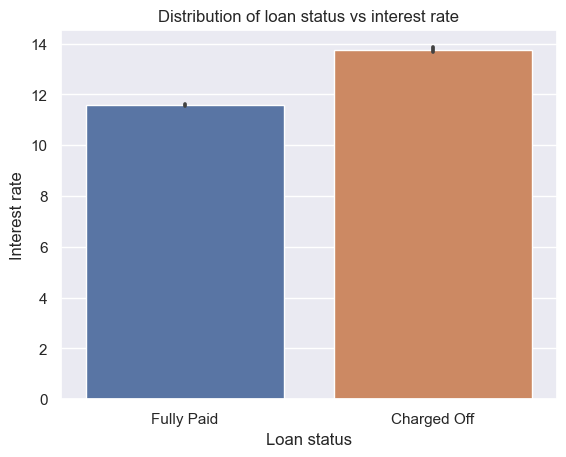

In [60]:
# Loan status via interest rate

sns.set(font_scale=1.0)
sns.barplot(data=loan_df2, x='loan_status',y="int_rate",  orient='v')
plt.title("Distribution of loan status vs interest rate", fontsize = 12)
plt.xlabel('Loan status')
plt.ylabel('Interest rate')
plt.show()

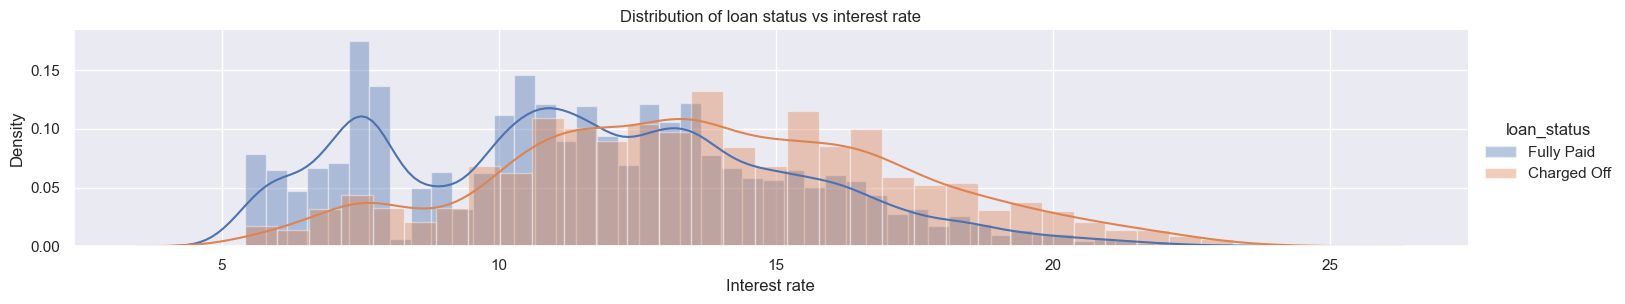

In [61]:
# facet grid for loan status vs interest rate

sns.FacetGrid(loan_df2, hue = "loan_status", aspect =5).map(sns.distplot,'int_rate').add_legend()
plt.title("Distribution of loan status vs interest rate", fontsize = 12)
plt.xlabel('Interest rate')
plt.show()

<font color = blue>**Inference( loan status vs interest rate )**<font>
    
    - Bar plot is showing that more interest rate is resulting in more charged offs.
    - With facet grid, it gives more clarity as there are overlaps with lower interest rate as well but as the interest rate is increasing, the chargingoffs are also increasing particularly around 12% where no. of chargeoffs has crossed the fully paid.

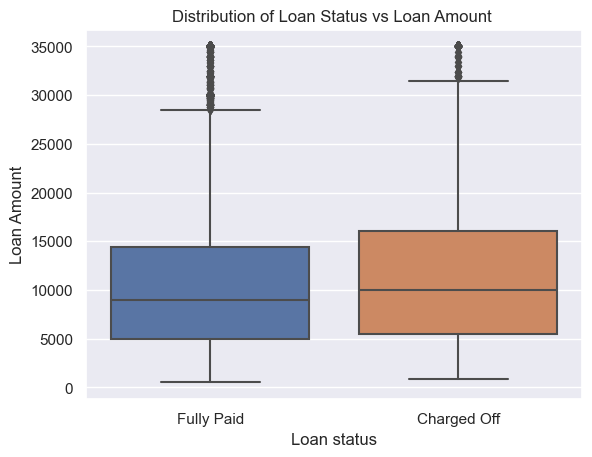

In [62]:
# Loan status vs Loan amount

sns.boxplot(data=loan_df2,x='loan_status',y="loan_amnt")
plt.title("Distribution of Loan Status vs Loan Amount ", fontsize = 12)
plt.xlabel('Loan status')
plt.ylabel('Loan Amount')
plt.show()

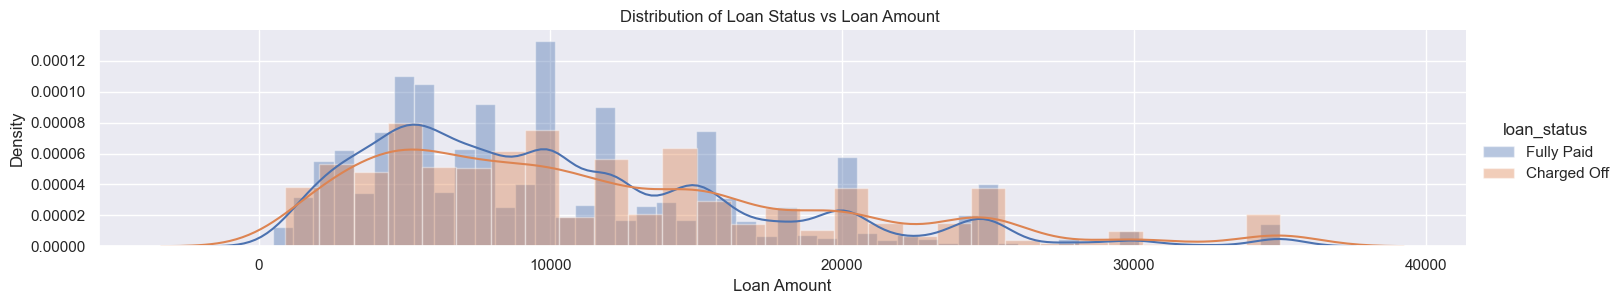

In [63]:
# facet grid for loan status vs loan amount
sns.FacetGrid(loan_df2, hue = "loan_status", aspect =5).map(sns.distplot,'loan_amnt').add_legend()
plt.title("Distribution of Loan Status vs Loan Amount ", fontsize = 12)
plt.xlabel('Loan Amount')
plt.show()

<font color = blue>**Inference(loan status vs loan amount )**<font>
    
   - From both the plots, it can be infered that borrowers are tending more towards charged off when the loan amount is more than 15000.

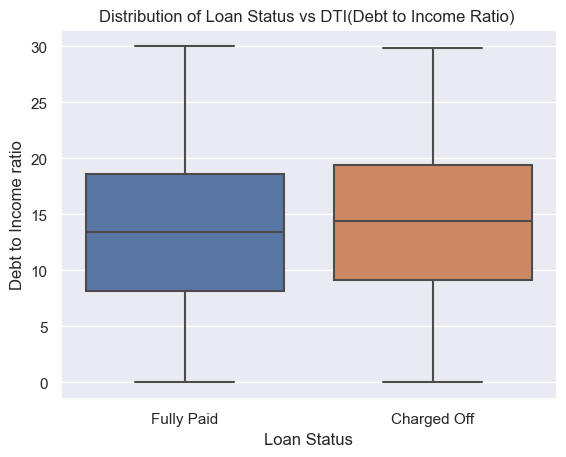

In [64]:
# Loan Status vs Debt to income ratio ( dti)
sns.boxplot(data=loan_df2, x='loan_status',y="dti",  orient='v')
plt.title("Distribution of Loan Status vs DTI(Debt to Income Ratio) ", fontsize = 12)
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income ratio')
plt.show()

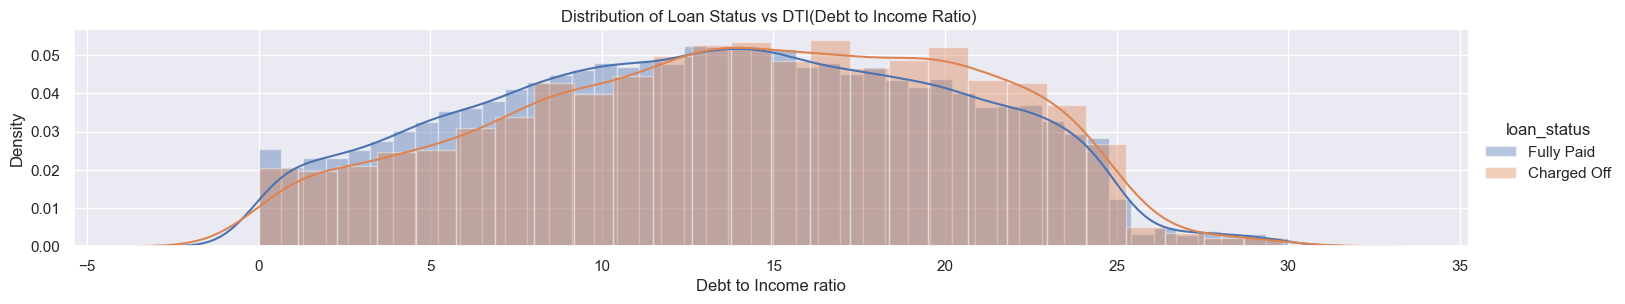

In [65]:
# facet grid for loan status vs DTI 
sns.FacetGrid(loan_df2, hue = "loan_status", aspect =5).map(sns.distplot,'dti').add_legend()
plt.title("Distribution of Loan Status vs DTI(Debt to Income Ratio) ", fontsize = 12)
plt.xlabel('Debt to Income ratio')
plt.show()

<font color = blue>**Inference(loan status vs DTI )**<font>
    
    - Charged off count is directly proportional to dti ratio.
    - 25th , 50th and 75th all percentile values for charged offs are more as compared to fully paid
    - There is quite good overlap but as soon as DTI crosses 15, chargeoffs are more.

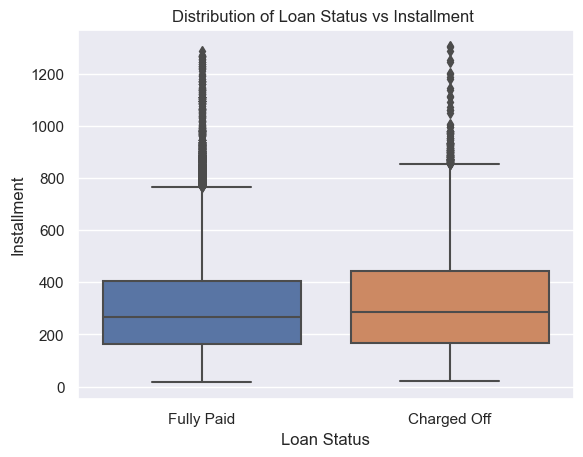

In [66]:
# Loan Status vs Installments
sns.boxplot(data=loan_df2, x='loan_status',y="installment",  orient='v')
plt.title("Distribution of Loan Status vs Installment ", fontsize = 12)
plt.xlabel('Loan Status')
plt.ylabel('Installment')
plt.show()

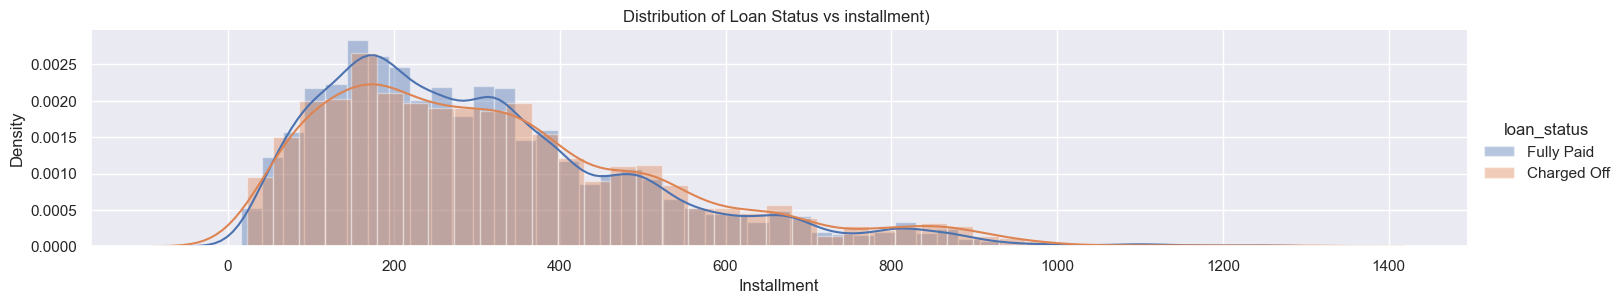

In [67]:
# facet grid for loan status vs Intallments

sns.FacetGrid(loan_df2, hue = "loan_status", aspect =5).map(sns.distplot,'installment').add_legend()
plt.title("Distribution of Loan Status vs installment) ", fontsize = 12)
plt.xlabel('Installment')
plt.show()

<font color = blue>**Inference( Loan status vs Installments )**<font>
    
    - There is good overlap of chargeoffs and fully paid for lower range of installments.
    - There is slight increase of charged offs as the intallment crosses 400.
   

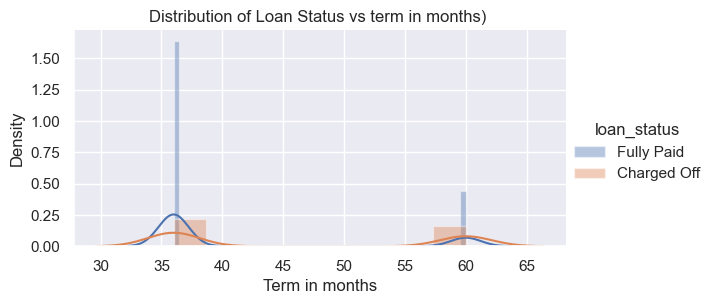

In [68]:
# loan status vs term in montha
sns.FacetGrid(loan_df2, hue = "loan_status",  aspect = 2).map(sns.distplot, "term_in_months").add_legend()
plt.title("Distribution of Loan Status vs term in months) ", fontsize = 12)
plt.xlabel('Term in months')
plt.show()

<font color = blue>**Inference( Loan status vs Term in Months )**<font>
    
    - There are only 2 values for term in months i.e. 36 and 60.
    - with 36 months of tenure, no. most of the loans are fully paid and there are less charged offs
    - With term of 60 months, we can see that no. of chargeoffs are more

#### 2. Bivariate analysis of Target variable (loan_status) with Categorical Variables

Here we will do the following analysis:
- Loan status vs purpose
- Loan status vs grade
- Loan status vs sub grade
- loan status vs home ownership
- loan status vs verification status

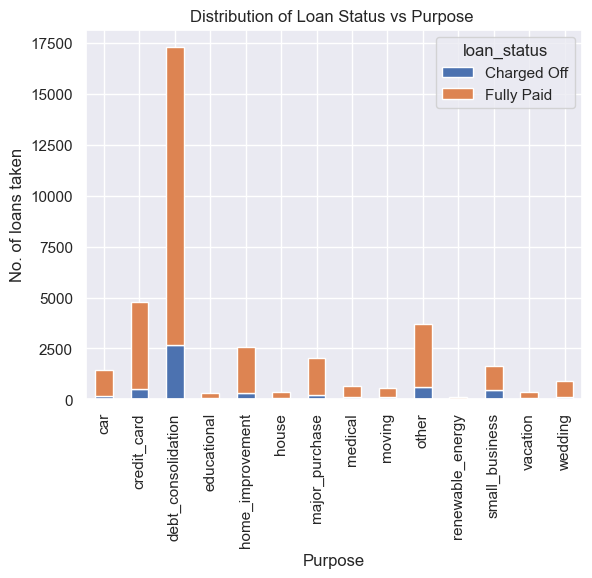

In [69]:
# loan status vs purpose
loan_df2.groupby(['purpose', 'loan_status']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Distribution of Loan Status vs Purpose ", fontsize = 12)
plt.xlabel('Purpose')
plt.ylabel('No. of loans taken')
plt.show()

It is not giving any good inference as wherever chargoffs are more, total no. of loans are also more in that category.
so we think we need to somehow find the chargeoff percentage and check its plot

In [70]:
# creating new data frame to understand the chargeoff percentage w.r.t purpose

df_purpose = loan_df2.groupby(['purpose', 'loan_status']).size().unstack().reset_index()

df_purpose["%chargedoff"]=(df_purpose['Charged Off']/(df_purpose['Fully Paid']+df_purpose['Charged Off']))*100
df_purpose.sort_values(by= ['%chargedoff'], inplace = True)
df_purpose

loan_status,purpose,Charged Off,Fully Paid,%chargedoff
13,wedding,92,800,10.313901
6,major_purchase,217,1828,10.611247
1,credit_card,519,4263,10.853199
0,car,159,1289,10.980663
4,home_improvement,322,2233,12.602740
12,vacation,52,313,14.246575
2,debt_consolidation,2675,14626,15.461534
7,medical,104,536,16.250000
5,house,55,283,16.272189
8,moving,90,460,16.363636


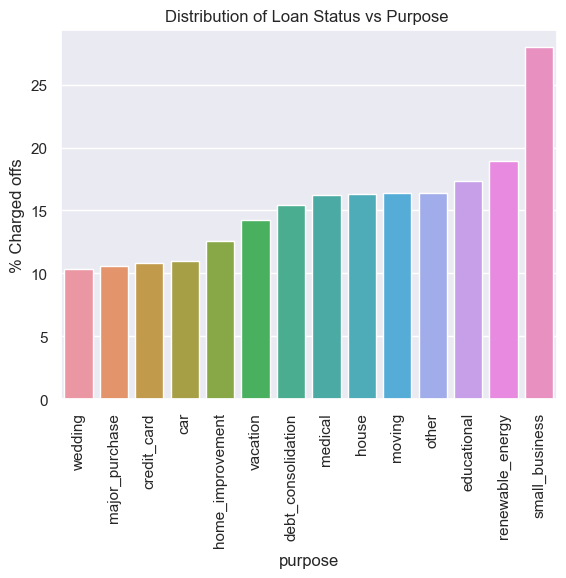

In [71]:
# Plotting bar plot of % charged offs with purpose

sns.barplot(data=df_purpose,x='purpose',y='%chargedoff')
plt.title("Distribution of Loan Status vs Purpose ", fontsize = 12)
plt.ylabel('% Charged offs')
plt.xticks(rotation = 90)
plt.show()

<font color = blue>**Inference(loan status vs Purpose )**<font>
    
    - % Charged offs with small businesses are far more than others.
    - It is then followed by loans taken for renewable energy and education though very less loan are taken for renwable energy and education

It is also observed that it is good way of analysing one catgorical variable with other . so we will continue taking 5 charged off w.r.t to other catgorical variables as well

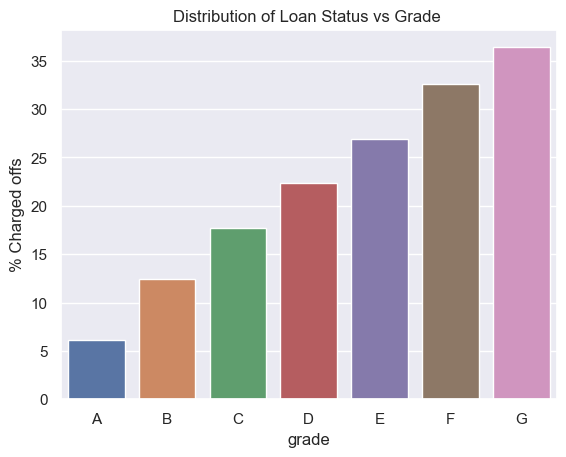

In [72]:
# loan status vs grade 

df_grade = loan_df2.groupby(['grade', 'loan_status']).size().unstack().reset_index()

df_grade["%chargedoff"]=(df_grade['Charged Off']/(df_grade['Fully Paid']+df_grade['Charged Off']))*100
df_grade.sort_values(by= ['%chargedoff'], inplace = True)
df_grade

# Plotting bar plot of % charged offs with purpose

sns.barplot(data=df_grade,x='grade',y='%chargedoff')
plt.title("Distribution of Loan Status vs Grade ", fontsize = 12)
plt.ylabel('% Charged offs')
plt.show()

Let's check the subgrade plot as well before putting any inference


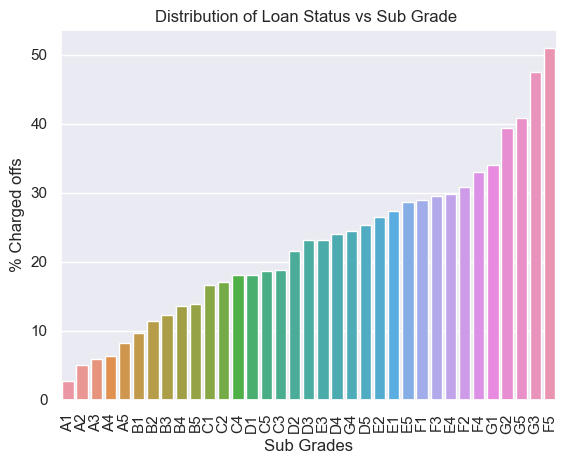

In [73]:
# loan status vs sub_grade 

df_sgrade = loan_df2.groupby(['sub_grade', 'loan_status']).size().unstack().reset_index()

df_sgrade["%chargedoff"]=(df_sgrade['Charged Off']/(df_sgrade['Fully Paid']+df_sgrade['Charged Off']))*100
df_sgrade.sort_values(by= ['%chargedoff'], inplace = True)
df_sgrade

# Plotting bar plot of % charged offs with purpose

sns.barplot(data=df_sgrade,x='sub_grade',y='%chargedoff')
plt.title("Distribution of Loan Status vs Sub Grade ", fontsize = 12)
plt.ylabel('% Charged offs')
plt.xlabel('Sub Grades')
plt.xticks(rotation =90)
plt.show()

<font color = blue>**Inference(loan status vs Grade and sub grade )**<font>
    
    - Both the plots showing increaing chargeoffs with increasing grade.
    - More risk of charge offs of loan falls under E, F and G grade

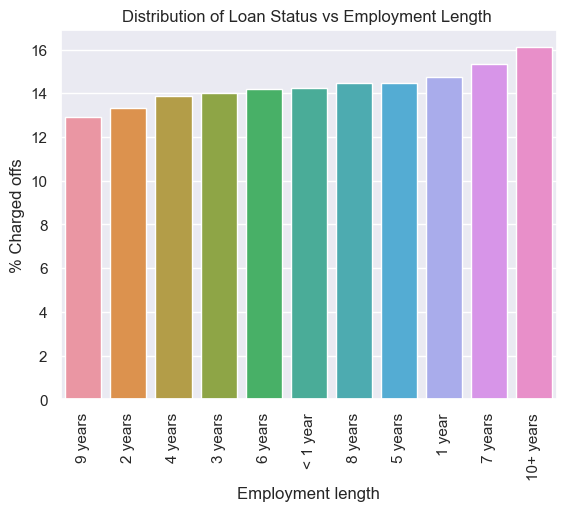

In [74]:
# loan status vs emp_length 

df_emp_length = loan_df2.groupby(['emp_length', 'loan_status']).size().unstack().reset_index()

df_emp_length["%chargedoff"]=(df_emp_length['Charged Off']/(df_emp_length['Fully Paid']+df_emp_length['Charged Off']))*100
df_emp_length.sort_values(by= ['%chargedoff'], inplace = True)
df_emp_length

# Plotting bar plot of % charged offs with purpose

sns.barplot(data=df_emp_length,x='emp_length',y='%chargedoff')
plt.title("Distribution of Loan Status vs Employment Length ", fontsize = 12)
plt.ylabel('% Charged offs')
plt.xlabel('Employment length')
plt.xticks(rotation =90)
plt.show()

<font color = blue>**Inference(loan status vs Employment length )**<font>
    
    - % chargeoffs with 10+ years are more probably due to high loan amount and high interest.
    - Employment length seems to have very little impact on loan status as such.

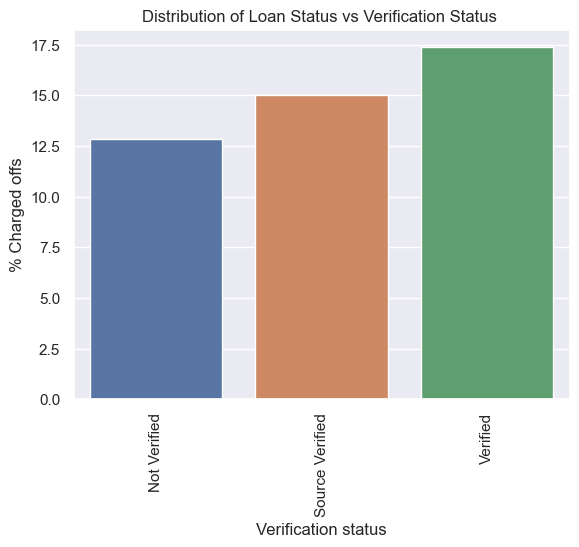

In [75]:
# loan status vs verification status 

df_verify = loan_df2.groupby(['verification_status', 'loan_status']).size().unstack().reset_index()

df_verify["%chargedoff"]=(df_verify['Charged Off']/(df_verify['Fully Paid']+df_verify['Charged Off']))*100
df_verify.sort_values(by= ['%chargedoff'], inplace = True)

# Plotting bar plot of % charged offs with purpose

sns.barplot(data=df_verify,x='verification_status',y='%chargedoff')
plt.title("Distribution of Loan Status vs Verification Status ", fontsize = 12)
plt.ylabel('% Charged offs')
plt.xlabel('Verification status')
plt.xticks(rotation =90)
plt.show()

<font color = blue>**Inference (loan status vs Verification Status )**<font>
    
    - % chargeoffs are more when loan requests are verified and source verified.
    - There is some scope of improvement here as more defaults are happening here as respect to not verified loans

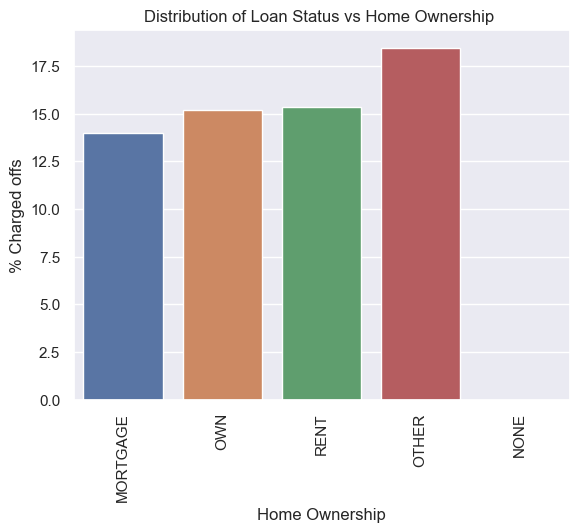

In [76]:
# loan status vs home ownership 

df_home = loan_df2.groupby(['home_ownership', 'loan_status']).size().unstack().reset_index()

df_home["%chargedoff"]=(df_home['Charged Off']/(df_home['Fully Paid']+df_home['Charged Off']))*100
df_home.sort_values(by= ['%chargedoff'], inplace = True)

# Plotting bar plot of % charged offs with purpose

sns.barplot(data=df_home,x='home_ownership',y='%chargedoff')
plt.title("Distribution of Loan Status vs Home Ownership ", fontsize = 12)
plt.ylabel('% Charged offs')
plt.xlabel('Home Ownership')
plt.xticks(rotation =90)
plt.show()

<font color = blue>**Inference(loan status vs Home Ownership )**<font>
    
    - % chargeoffs for others categoty is more.
    - Home ownership seems not to be good driving factor for deciding loan approval.

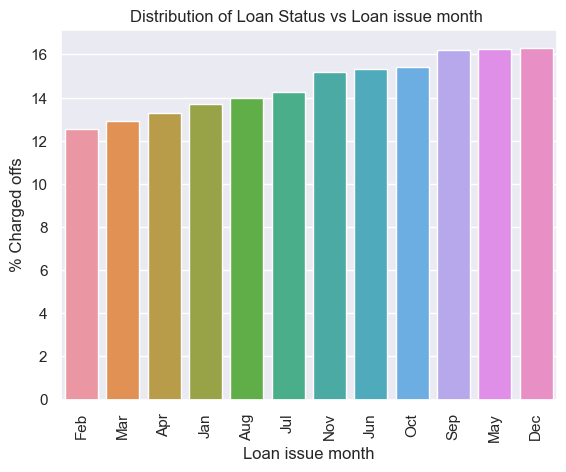

In [77]:
# loan status vs loan issue month

df_month = loan_df2.groupby(['loan_issue_month', 'loan_status']).size().unstack().reset_index()

df_month["%chargedoff"]=(df_month['Charged Off']/(df_month['Fully Paid']+df_month['Charged Off']))*100
df_month.sort_values(by= ['%chargedoff'], inplace = True)

# Plotting bar plot of % charged offs with purpose

sns.barplot(data=df_month,x='loan_issue_month',y='%chargedoff')
plt.title("Distribution of Loan Status vs Loan issue month ", fontsize = 12)
plt.ylabel('% Charged offs')
plt.xlabel('Loan issue month')
plt.xticks(rotation =90)
plt.show()

<font color = blue>**Inference(Loan status vs Loan issue month )**<font>
    
    - More chargeoff % in second half of year and in month of may.  

#### 1. Bivariate analysis of Independent Variables

     Here we will do the following analysis
 
    - Grade vs Interest rate
    - Grade vs Annual income
    - Grade vs Loan Amount
    - Purpose vs Interest rate
    - Purpose vs Annual income
    - Purpose vs Loan Amount
    - Emp length vs Interest rate
    - Emp length vs Annual income
    - Emp length vs Loan Amount

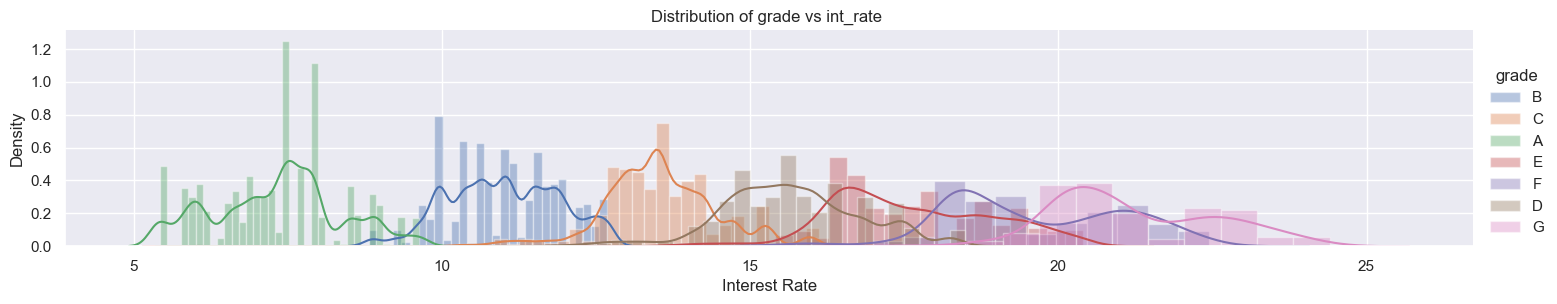

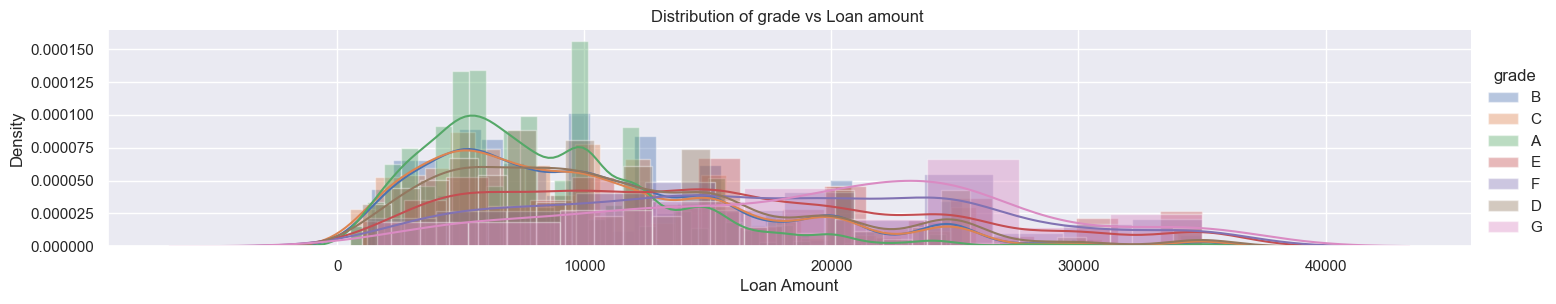

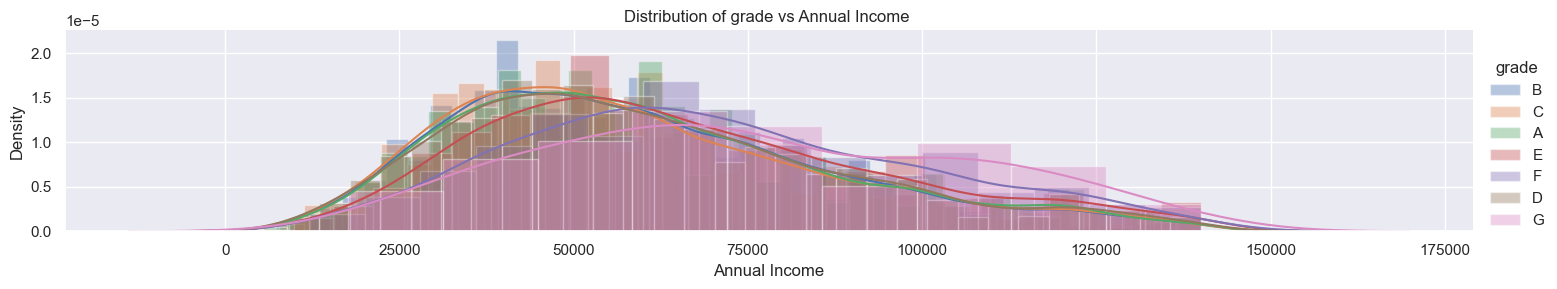

In [78]:
# Grade vs Interest rate , Grade vs Loan amount, Grade vs Annual Income

sns.FacetGrid(loan_df2, hue = "grade", aspect =5 ).map(sns.distplot, "int_rate" ).add_legend()
plt.title("Distribution of grade vs int_rate ", fontsize = 12)
plt.xlabel('Interest Rate')

sns.FacetGrid(loan_df2, hue = "grade", aspect =5 ).map(sns.distplot, "loan_amnt" ).add_legend()
plt.title("Distribution of grade vs Loan amount ", fontsize = 12)
plt.xlabel('Loan Amount')

sns.FacetGrid(loan_df2, hue = "grade", aspect =5 ).map(sns.distplot, "annual_inc" ).add_legend()
plt.title("Distribution of grade vs Annual Income ", fontsize = 12)
plt.xlabel('Annual Income')
plt.show()


<font color = blue>**Inference**<font>
    
- Risker grades( E, F and G) have high interest rates.
- Though there are quite overlaps within grades for loan amount but as the loan amount is increasing trend is that they are falling more under high risk grades
- Annual income does not show any clear trend with respect to grade. 


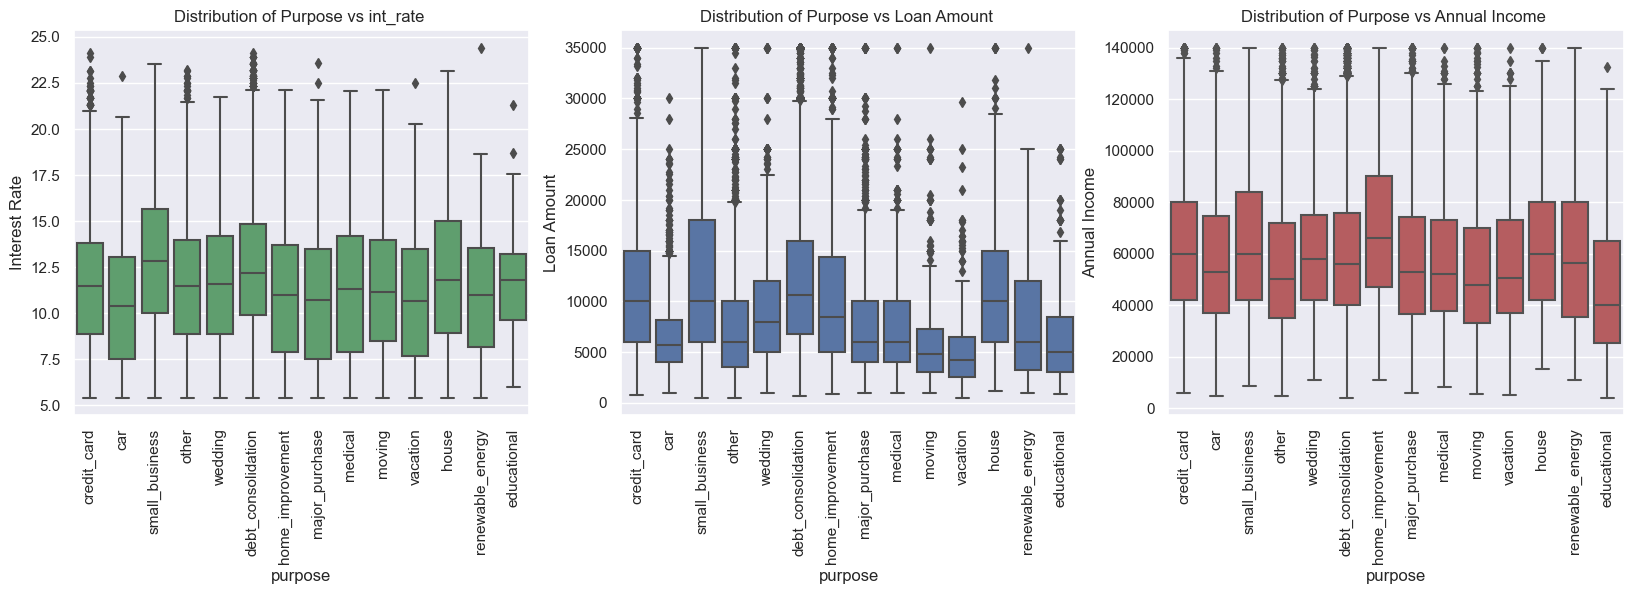

In [79]:
# Purpose vs Interest rate , Purpose vs Loan amount, purpose vs Annual Income

f, axes = plt.subplots(1,3,  figsize=(20, 5))

ax1 = sns.boxplot(data=loan_df2, x="purpose",y="int_rate" ,ax= axes[0] ,color= 'g')
ax1.set_title("Distribution of Purpose vs int_rate ", fontsize = 12)
ax1.set_ylabel('Interest Rate')
ax1.tick_params(axis='x', rotation=90)

ax2 = sns.boxplot(data=loan_df2, x="purpose",y="loan_amnt", ax= axes[1], color= 'b')
ax2.set_title("Distribution of Purpose vs Loan Amount ", fontsize = 12)
ax2.set_ylabel('Loan Amount')
ax2.tick_params(axis='x', rotation=90)

sns.boxplot(data=loan_df2, x="purpose",y="annual_inc",  color= 'r')
plt.title("Distribution of Purpose vs Annual Income ", fontsize = 12)
plt.ylabel('Annual Income')
plt.xticks(rotation =90)
plt.show()



<font color = blue>**Inference**<font>
    
- Small Business category is having high interest rate (> mean interest rate i.e 12% ) then debt consolidation and then house
- Clearly loan amount is highest for small businesses, then debt consolidation and then house
- Borrowers with higher income is taking loan mostly for home improvements, for small businesses and then credit cards

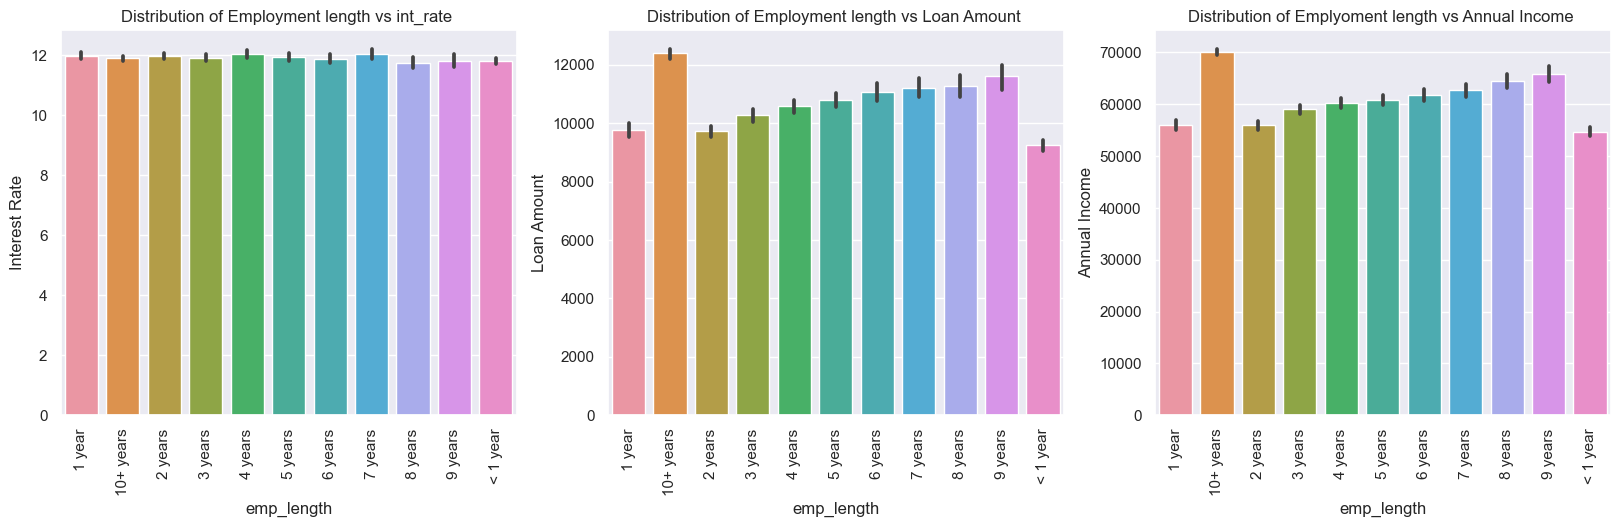

In [80]:
# Emp Length vs Interest rate , Emp Length vs Loan amount, Emp Length vs Annual Income

loan_df2.sort_values(by = ['emp_length'], inplace = True)

f, axes = plt.subplots(1,3,  figsize=(20, 5))

ax1 = sns.barplot(data=loan_df2, x="emp_length",y="int_rate" ,ax= axes[0] )
ax1.set_title("Distribution of Employment length vs int_rate ", fontsize = 12)
ax1.set_ylabel('Interest Rate')
ax1.tick_params(axis='x', rotation=90)

ax2 = sns.barplot(data=loan_df2, x="emp_length",y="loan_amnt", ax= axes[1])
ax2.set_title("Distribution of Employment length vs Loan Amount ", fontsize = 12)
ax2.set_ylabel('Loan Amount')
ax2.tick_params(axis='x', rotation=90)

sns.barplot(data=loan_df2, x="emp_length",y="annual_inc")
plt.title("Distribution of Emplyoment length vs Annual Income ", fontsize = 12)
plt.ylabel('Annual Income')
plt.xticks(rotation =90)
plt.show()


<font color = blue>**Inference**<font>
    
- Employment length has no impact on interest rate provided in loans
- With the increase in emploment length, loan amounts are also increasing
- Annual income is increasing with emploment length.

#### Multivariate analysis of Independent Variables

     Here we will study the impact of multiple variables on loan_status
 

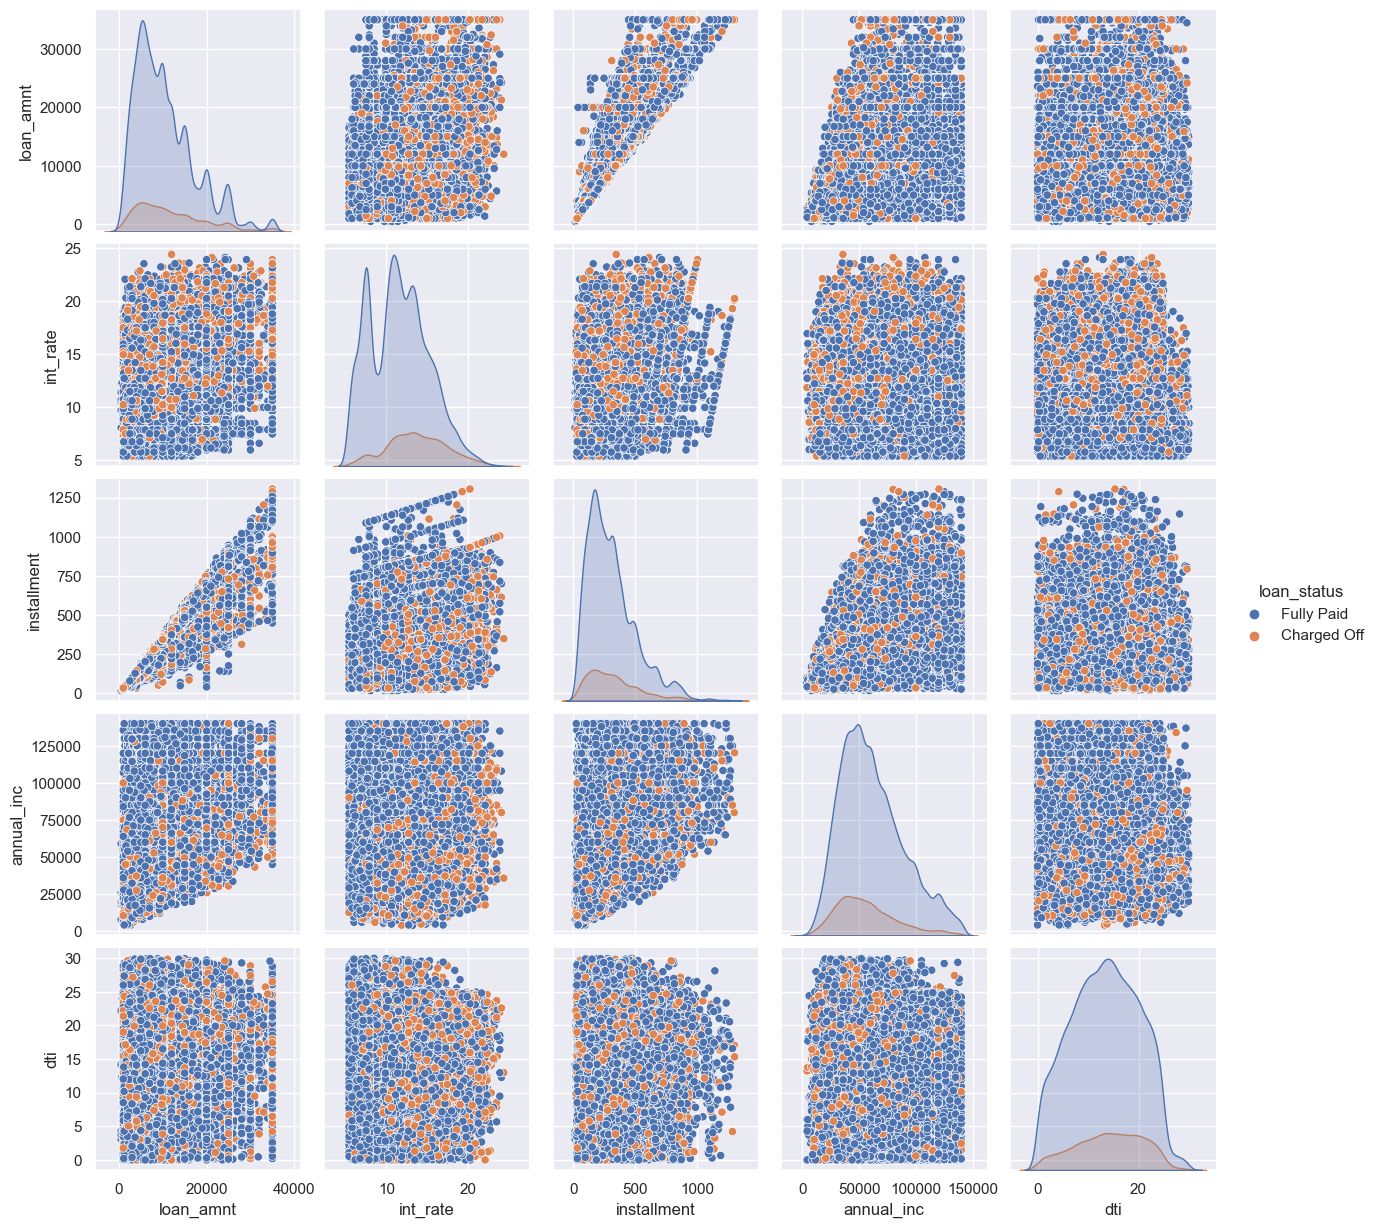

In [81]:
# pairplot of numerical variables showing the impact on loan_status
sns.pairplot(data=loan_df2[['loan_amnt','int_rate','installment','annual_inc','loan_status', 'dti']],hue='loan_status')
plt.show()

<font color = blue>**Inference**<font>
    
- With the increase of interest rate ( >12%) , chances of loan defaults increases irrespective of the increase of other variables. Which shows Interest rate is one of the most important driving factor .
- As the annual income becomes higher than 1L, chances of defaults are decreasing.
- If loan amount is more then having higher annual income will leads to less charged offs
- If dti is more than having high income will compensate the risk of being charged off


## Conclusion:

**Factors impacting chargeoffs**
- More **interest rate** is resulting in more charged offs.
- Borrowers are tending more towards charged off when the **loan amount is more than 15000**.
- % Charged offs are highest with **small businesses** than renewable energy and than education and so on.
- More risk of charge offs if loan falls under **E, F and G grade**   
- More chargeoff % in second half of year and in month of may.
     
**General factors**
- Interest rates are increasing from grades A to G
- Loan amount is highest for small businesses, then debt consolidation and then house
- Small Business category is having high interest rate (> mean interest rate i.e 12% ) 
- Borrowers with higher income is taking loan mostly for home improvements,than for small businesses and then credit cards
- If loan amount is more then having higher annual income will leads to less charged offs
 
**Features having no or least impact on charged off** 
 - Home ownership seems not to be good driving factor for deciding loan approval
 - Employment length seems to have very little impact in loan status as such
 - Could not depend solely on verification as the results are not in favor
    
    
    
    
    
  

## Recommendations

- Verification status can be improved as there are more charged off percentage for verified applications.
- While giving loans for small business purpose, if annual income is more then loans can be given on interest rate less than 12%
- Loans with higher annual income are safe if loans are taken for home improvements. For other purposes, it needs to be validated.
- Can scale up the loans for category  A,B & C as the charged off% is less as compared to other categories.

